In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.plotting.register_matplotlib_converters()
#''' pd.plotting.register_matplotlib_converters: This line registers converters from pandas to Matplotlib. Matplotlib is another popular Python library for creating data visualizations. This line ensures that when you use pandas plotting functions, Matplotlib can correctly interpret the data types from your pandas DataFrames or Series.
   # %maplotlib inline this tells the notebook to display images in notebook only '''

player_data = pd.read_excel('player_expected_stats.xlsx',index_col = 'name')

player_data.columns

Index(['position', 'team', 'role', 'total_points', 'chance_playing', 'form',
       'VS', 'performance_ratio', 'xfpl', 'xfpl&f', 'xG', 'xA', 'xGC', 'xBP',
       'CS%', 'xS', 'mp', 'xYC', 'xPS', 'xPM', 'xRC', 'price'],
      dtype='object')

In [2]:
plt.figure(figsize=(14,10))

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

<AxesSubplot: xlabel='team', ylabel='xG'>

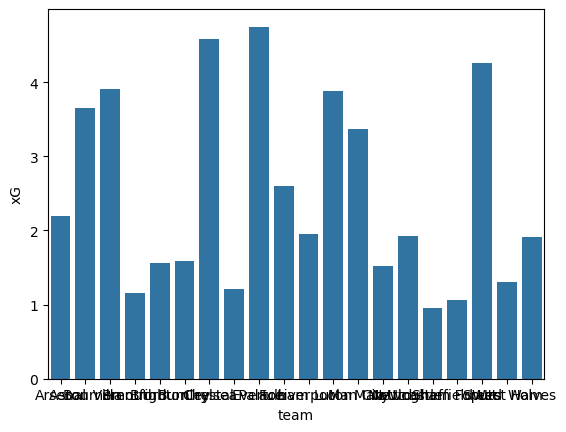

In [3]:
sns.barplot(data = player_data.groupby('team').xG.sum())

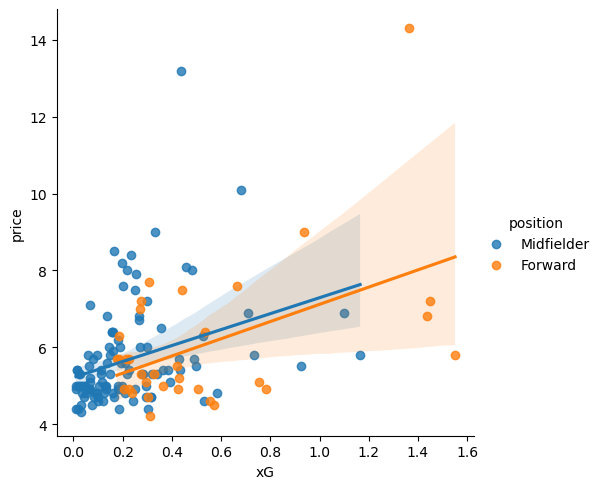

In [11]:
sns.lmplot(x='xG',y='price',hue = 'position',data = player_data.loc[player_data.position.isin(['Forward','Midfielder'])])
# we can see how there is more postive coreallatioin between xG and price for Forwards then for Midfielders 

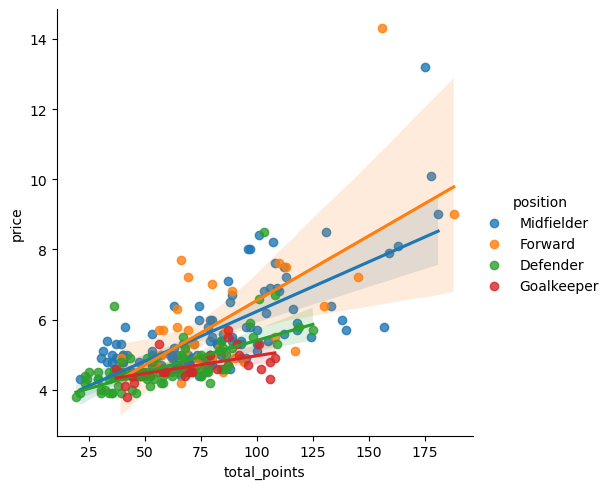

In [13]:
sns.lmplot(x='total_points',y='price',hue = 'position',data = player_data)
# this graphs proves how much underrated the defenders are for the same price they give you more points

/usr/lib/python3/dist-packages/seaborn/categorical.py:3399: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot: xlabel='position', ylabel='xBP'>

/usr/lib/python3/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/lib/python3/dist-packages/seaborn/categorical.py:3399: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


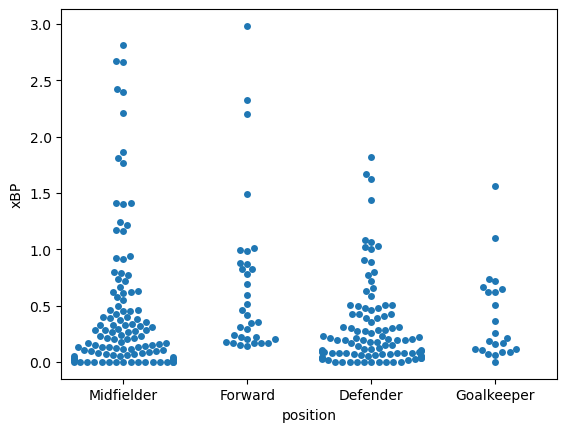

In [14]:
sns.swarmplot(x='position',y='xBP',data = player_data)

<AxesSubplot: xlabel='position', ylabel='xBP'>

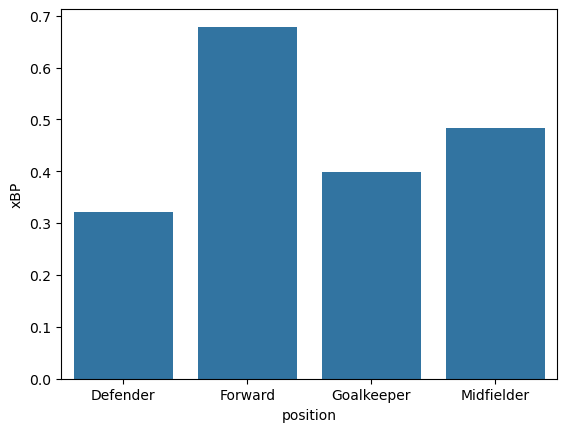

In [17]:
sns.barplot(data = player_data.groupby('position').xBP.mean())
# this proves how forwards are the match winners for their team 

In [18]:
player_data.head()

,position,team,role,total_points,chance_playing,form,VS,performance_ratio,xfpl,xfpl&f,...,xGC,xBP,CS%,xS,mp,xYC,xPS,xPM,xRC,price
name,,,,,,,,,,,,,,,,,,,,,
Cole Palmer,Midfielder,Chelsea,starter,157,100,11.0,'Sheffield Utd',2.357143,12.404459,14.842052,...,0.879827,2.814029,0.249432,0.0,1839,0.342577,0.0,0.000000,0.0,5.8
Erling Haaland,Forward,Man City,starter,156,100,3.3,'Crystal Palace',1.416667,10.510363,7.227783,...,0.757856,2.982107,0.345952,0.0,2012,0.044732,0.0,0.044732,0.0,14.3
Son Heung-min,Midfielder,Spurs,starter,178,100,9.0,'Nottingham Forest',1.859195,9.732373,10.721008,...,1.007525,2.666667,0.361211,0.0,2160,0.041667,0.0,0.000000,0.0,10.1
Richarlison de Andrade,Midfielder,Spurs,starter,109,100,0.5,'Nottingham Forest',1.859195,9.256474,2.433470,...,0.954607,1.238938,0.361211,0.0,1356,0.199115,0.0,0.000000,0.0,6.9
Dominic Solanke,Forward,Bournemouth,starter,145,100,4.2,'Luton',2.456897,8.923100,8.129443,...,0.789558,0.994572,0.432964,0.0,2579,0.104692,0.0,0.034897,0.0,7.2


In [24]:
player_data[player_data.role == 'starter'].groupby('team').form.mean().sort_values(ascending = False)

team
Arsenal              5.100000
Newcastle            3.950000
Man Utd              3.666667
Spurs                3.483333
Bournemouth          3.281818
West Ham             2.963636
Fulham               2.950000
Chelsea              2.909091
Liverpool            2.887500
Man City             2.827273
Aston Villa          2.645455
Brentford            1.937500
Brighton             1.775000
Luton                1.700000
Crystal Palace       1.600000
Burnley              1.575000
Nottingham Forest    1.480000
Everton              1.425000
Wolves               1.333333
Sheffield Utd        1.130000
Name: form, dtype: float64